#### **Batch-16, Update every 500 frames**

In [61]:
# Image processing parameters
IMAGE_SHAPE = (84, 80)  # Standard image size for Atari games
STACK_SIZE = 8          # Number of frames to stack to capture motion

# Hyperparameters as specified in the assignment
# Update these hyperparameters
BATCH_SIZE = 16             # Increase from 8 to at least 32
TARGET_UPDATE_FREQ = 500    # Update based on frames, not episodes
GAMMA = 0.99                 # Increase discount factor
EPSILON_DECAY = 0.995       # Much slower decay
TRAINING_START = 10000       # Start training after collecting more experiences
LEARNING_RATE = 0.00025      # Slightly higher learning rate         # Minimum exploration rate ε_min
EPSILON_INIT = 1.0           # Initial exploration rate ε
EPSILON_DECAY = 0.995      # Much slower decay rate
EPSILON_MIN = 0.05           # Minimum exploration rate ε_min
# Additional hyperparameters (not explicitly specified in assignment)
MEMORY_SIZE = 10000         # Replay buffer size
TRAINING_START = 1000       # Start training after collecting this many frames

Mounted at /content/drive
Environment: PongDeterministic-v4
Observation Space: Box(0, 255, (210, 160, 3), uint8)
Action Space: Discrete(6)
Episode 1/10, Steps: 843, Reward: -21.0, Epsilon: 1.0000
Updated target network at frame 1000
Updated target network at frame 1500
Episode 2/10, Steps: 764, Reward: -21.0, Epsilon: 0.4668
Updated target network at frame 2000
Episode 3/10, Steps: 764, Reward: -21.0, Epsilon: 0.1792
Updated target network at frame 2500
Updated target network at frame 3000
Episode 4/10, Steps: 882, Reward: -21.0, Epsilon: 0.0592
Updated target network at frame 3500
Updated target network at frame 4000
Episode 5/10, Steps: 764, Reward: -21.0, Epsilon: 0.0500
Model saved at episode 5 to /content/drive/MyDrive/pong_dqn_models_batch_16/pong_dqn_episode_5.keras
Updated target network at frame 4500
Episode 6/10, Steps: 764, Reward: -21.0, Epsilon: 0.0500
Updated target network at frame 5000
Updated target network at frame 5500
Episode 7/10, Steps: 764, Reward: -21.0, Epsilon

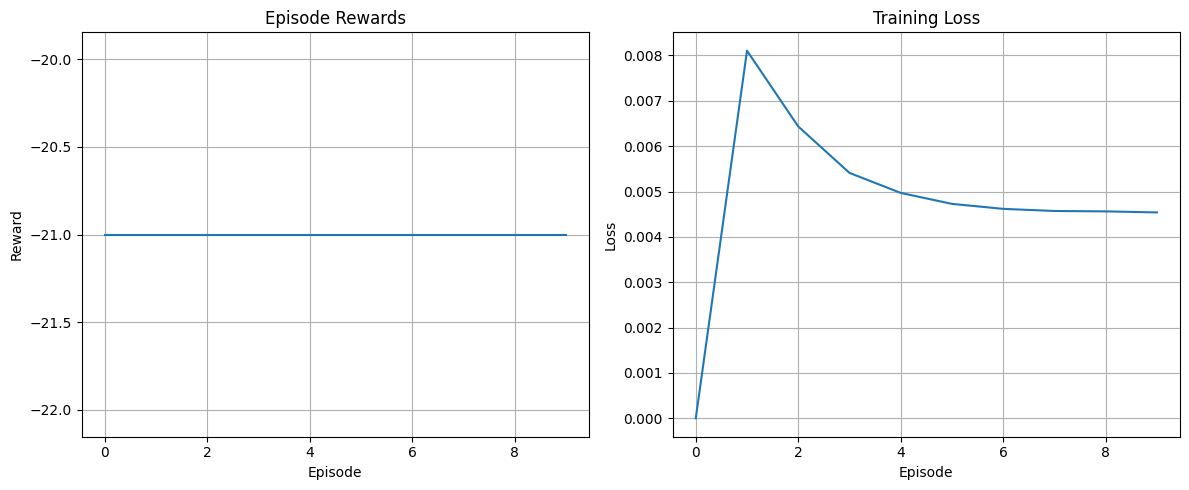

In [62]:
rewards, losses = train_dqn(ENV_NAME, total_episodes=10, render=False, type="batch_16")

## Visualize Training Results
"""
This code visualizes the training progress by plotting the rewards and losses.
"""
# Plot the rewards
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(rewards)
plt.title('Episode Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.grid(True)

# Adding a moving average to see trends better
if len(rewards) > 10:
    moving_avg = np.convolve(rewards, np.ones(10)/10, mode='valid')
    plt.plot(range(9, len(rewards)), moving_avg, 'r', label='10-episode moving average')
    plt.legend()

# Plot the losses
plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.savefig('training_results.png')  # Save the figure
plt.show()

In [63]:
import gym

def evaluate_agent(env_name, model_filename, n_episodes=5, render=True, type="batch_8"):
    from google.colab import drive
    drive.mount('/content/drive', force_remount=False)  # Don't force remount if already mounted

    # Construct path to the model file
    model_path = f'/content/drive/MyDrive/pong_dqn_models_{type}/{model_filename}'
    print(f"Loading model from: {model_path}")
    """Evaluate a trained DQN agent."""
    env = gym.make(env_name, render_mode='rgb_array')
    n_actions = env.action_space.n

    # Load the agent
    agent = DQNAgent((IMAGE_SHAPE[0], IMAGE_SHAPE[1], STACK_SIZE), n_actions)
    agent.load_model(model_path)
    # Use a small epsilon for some exploration during evaluation
    agent.epsilon = 0.05

    total_rewards = []

    for episode in range(n_episodes):
        observation, _ = env.reset()
        frame_stacker = FrameStacker(IMAGE_SHAPE, STACK_SIZE)
        state = frame_stacker.reset(observation)

        episode_reward = 0
        done = False
        step = 0

        while not done:
            # Select action
            action = agent.get_action(state)

            # Execute action
            next_observation, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            # Stack frames for next state
            next_state = frame_stacker.add_frame(next_observation)

            # Update state and accumulate reward
            state = next_state
            episode_reward += reward
            step += 1

            # Render if required
            if render:
                display.clear_output(wait=True)
                plt.imshow(env.render())
                plt.axis('off')
                display.display(plt.gcf())
                plt.clf()

        total_rewards.append(episode_reward)
        print(f"Evaluation Episode {episode+1}/{n_episodes}, Steps: {step}, Reward: {episode_reward}")

    # Calculate statistics
    avg_reward = np.mean(total_rewards)
    std_reward = np.std(total_rewards)

    print(f"Evaluation Results:")
    print(f"Average Reward: {avg_reward:.2f} ± {std_reward:.2f}")
    print(f"Min Reward: {np.min(total_rewards)}")
    print(f"Max Reward: {np.max(total_rewards)}")

    env.close()
    return total_rewards

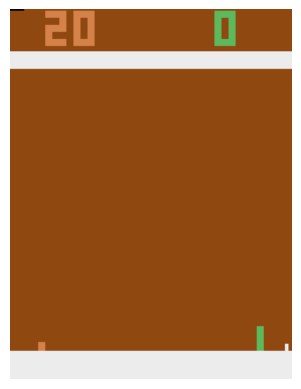

Evaluation Episode 5/5, Steps: 764, Reward: -21.0
Evaluation Results:
Average Reward: -20.80 ± 0.40
Min Reward: -21.0
Max Reward: -20.0
Average Evaluation Reward: -20.8


<Figure size 640x480 with 0 Axes>

In [64]:
evaluation_rewards = evaluate_agent(ENV_NAME, "pong_dqn_final.keras", n_episodes=5, type="batch_16_500frames")
print(f"Average Evaluation Reward: {np.mean(evaluation_rewards)}")